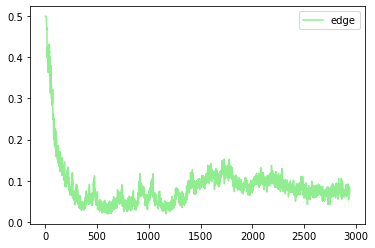

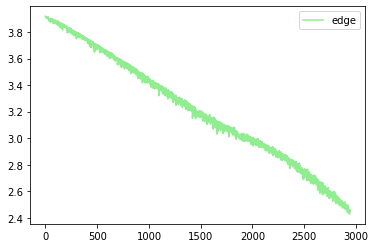

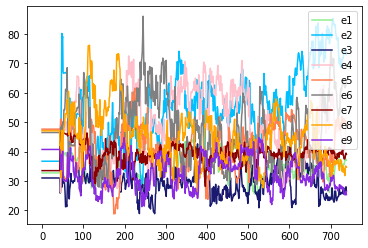

/home/neardws/anaconda3/envs/aov/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/neardws/anaconda3/envs/aov/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/neardws/anaconda3/envs/aov/lib/python3.9/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/neardws/anaconda3/envs/aov/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/neardws/anaconda3/envs/aov/lib/python3.9/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


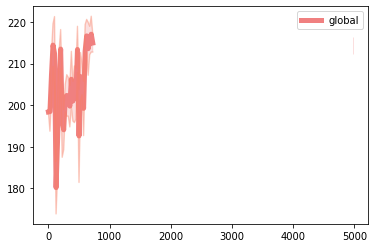

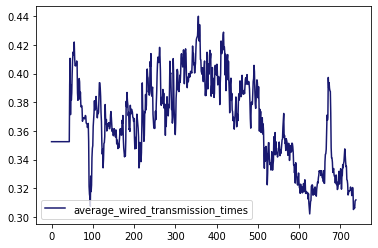

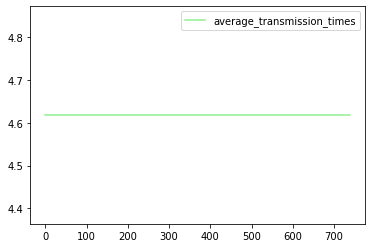

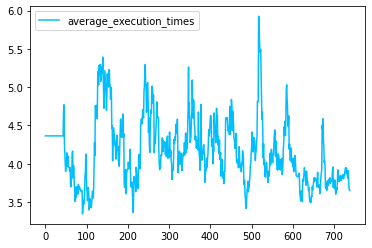

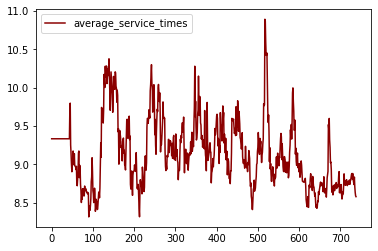

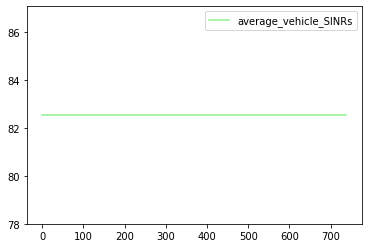

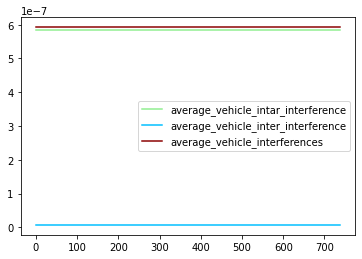

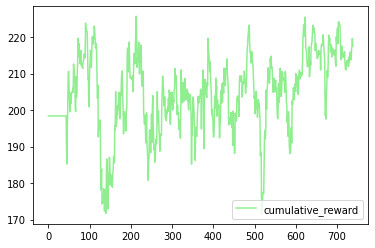

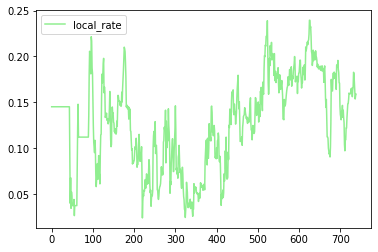

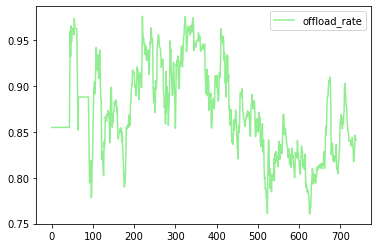

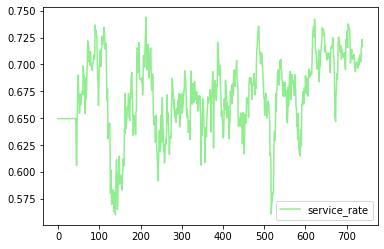

213
Average service rate:  0.7439024390243902
Cumulative reward:  225.69469860205143
Average edge reward:  46.89194374
Average service time: 8.317310187714549
Average transmission times:  4.617975796018109
local rate:  0.1000497760079641
edge_rate:  0.8999502239920358
********************************
Average service rate:  0.7104280736684918
Cumulative reward:  216.25822795195845
Average edge reward:  46.89194374
Average service time: 8.639336269158342
Average transmission times:  4.617975796018109
Local rate:  0.09325535092085611
Edge rate:  0.9067446490791438


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)

# MAD4PG
# scenario = 1
file_name = "/home/neardws/acme/3dd2da48-278e-11ed-abde-04d9f5632a58/"
# scenario = 2
file_name = "/home/neardws/acme/4d039f34-278e-11ed-987e-04d9f5632a58/"
# scenario = 3
# file_name = "/home/neardws/acme/5d1d40a0-278e-11ed-b0cf-04d9f5632a58/"
# scenario = 4
# file_name = "/home/neardws/acme/6c598dda-278e-11ed-ac11-04d9f5632a58/"

# 1-10 GHz
# file_name = "/home/neardws/acme/b68ee6aa-28d5-11ed-a03e-04d9f5632a58/"
# 2-10 GHz
# file_name = "/home/neardws/acme/c43d54e4-28d5-11ed-95e6-04d9f5632a58/"
# 4-10 GHz
# file_name = "/home/neardws/acme/cfa33b6e-28d5-11ed-92e3-04d9f5632a58/"
# 5-10 GHz
# file_name = "/home/neardws/acme/da9ced8a-28d5-11ed-bfdf-04d9f5632a58/"

# different task rate
# 0.3
# file_name = "/home/neardws/acme/345085ac-29f4-11ed-9986-04d9f5632a58/"
# 0.4
# file_name = "/home/neardws/acme/3f44e278-29f4-11ed-8276-04d9f5632a58/"
# 0.6 
# file_name = "/home/neardws/acme/48cdf974-29f4-11ed-8dd6-04d9f5632a58/"
# 0.7
file_name = "/home/neardws/acme/516cbeda-29f4-11ed-99dd-04d9f5632a58/"



start_index = 0
loss_file_name = file_name + "logs/learner/logs.csv"
returns_file_name = file_name + "logs/evaluator/logs.csv"
# actor_file_name = file_name + "logs/actor/logs.csv"

name=["critic_loss", "evaluator_episodes", "evaluator_steps", "learner_steps", "learner_walltime", "policy_loss"]
loss_df = pd.read_csv(loss_file_name, names=name, header=0)

edge_policy_loss = loss_df["policy_loss"].values.tolist()
epoch_index = [i for i in range(len(edge_policy_loss))]
epoch_index = epoch_index[start_index:]
plt.plot(epoch_index, edge_policy_loss[start_index: ], '-', color='lightgreen', label='edge')
plt.legend(loc="best")  # 图例
plt.show()

edge_critic_loss = loss_df["critic_loss"].values.tolist()
epoch_index = [i for i in range(len(edge_critic_loss))]
epoch_index = epoch_index[start_index:]

plt.plot(epoch_index, edge_critic_loss[start_index: ], '-', color='lightgreen', label='edge')
plt.legend(loc="best")  # 图例
plt.show()
colors = ['lightcoral', 'orange', 'lightgreen', 'cornflowerblue', 'darkviolet', 'seashell', 'honeydew', 'lightcyan']

def get_mean_and_standard_deviation_result(result, ranges, max_num):
    """From a list of lists of agent results it extracts the mean results and the mean results plus or minus
        some multiple of the standard deviation"""
    mean_results = []
    mean_minus_std = []
    mean_plus_std = []
    index = 0
    for i in range(int(max_num / ranges) - 1):
        result_at_a_range = result[index: index + ranges]
        index += ranges
        mean_result = np.mean(result_at_a_range)
        std_result = np.std(result_at_a_range)
        mean_results.append(mean_result)
        mean_minus_std.append(mean_result - std_result)
        mean_plus_std.append(mean_result + std_result)
    
    result_at_a_range = result[-ranges:]
    mean_result = np.mean(result_at_a_range)
    std_result = np.std(result_at_a_range)
    mean_results.append(mean_result)
    mean_minus_std.append(mean_result - std_result)
    mean_plus_std.append(mean_result + std_result)
    return mean_minus_std, mean_results, mean_plus_std


def draw_one_result(axe, epoch_index, rewards, ranges, max_num, colors, line_label, linewidth=5.0):
    mean_minus_std, mean_results, mean_plus_std = get_mean_and_standard_deviation_result(rewards, ranges, max_num)
    x_vals = list(range(len(mean_results)))
    nex_x_vals = [x * ranges for x in x_vals]
    axe.plot(nex_x_vals, mean_results, color=colors[0], label=line_label, linewidth=linewidth)
    axe.plot(nex_x_vals, mean_plus_std, color=colors[1], alpha=0.25)
    axe.plot(nex_x_vals, mean_minus_std, color=colors[1], alpha=0.25)
    axe.fill_between(nex_x_vals, y1=mean_minus_std, y2=mean_plus_std, alpha=0.25, color=colors[0])


names=["average_execution_times", "average_service_times", "average_transmision_times", "average_vehicle_SINRs", "average_vehicle_intar_interference", "average_vehicle_inter_interference",  "average_vehicle_interferences", "average_wired_transmission_times", "cumulative_reward", "episode_length", "episode_return", "evaluator_episodes", "evaluator_steps", "local_rate", "offload_rate", "service_rate", "steps_per_second"]
# returns_df = pd.read_csv(returns_file_name, names=["actor_episodes", "actor_steps", "episode_length", "episode_return", "evaluator_episodes", "evaluator_steps", "steps_per_second"], header=0)

ranges = 10
max_num = 1050
y_min = 0

colors = ['lightcoral', 'coral', 'orange', 'wheat', 'lightgreen', 'limegreen', 'cornflowerblue', 'royalblue',  'darkviolet', 'violet']
# df = pd.read_csv("CR.csv", names=["", "ra_cvsq", "ra_cvsp", "d4pg_cvsq", "d4pg_cvsp", "mad4pg_cvsq", "mad4pg_cvsp", "mamo_cvsq", "mamo_cvsp"], header=0)
# epoch_index = df[""].values.tolist()
# ra_rewards = df["ra_cvsq"].values.tolist()
# c_ddpg_rewards = df["d4pg_cvsq"].values.tolist()
# iac_ga_rewards = df["mad4pg_cvsq"].values.tolist()
# hdr_madrl_rewards = df["mamo_cvsq"].values.tolist()

# draw_one_result(plt, epoch_index, ra_rewards, ranges, max_num, colors[0:2], line_label=labels[0])
# draw_one_result(plt, epoch_index, c_ddpg_rewards, ranges, max_num, colors[4:6], line_label=labels[1])
# draw_one_result(plt, epoch_index, iac_ga_rewards, ranges, max_num, colors[6:8], line_label=labels[2])
# draw_one_result(plt, epoch_index, hdr_madrl_rewards, ranges, max_num, colors[8:], line_label=labels[3])

# plt.xlim(xmin=0, xmax=max_num-50)
# plt.ylim(ymin=100, ymax=300)
# plt.xlabel("Number of Iterations")  # 横坐标名字





returns_df = pd.read_csv(returns_file_name, names=names, header=0)
episode_return = returns_df["episode_return"].values
returns = np.zeros(shape=(len(episode_return), 10))

for ret_index in range(episode_return.shape[0]):
    process_str = episode_return[ret_index].replace("[", "").replace("]", "").split(" ")
    while "" in process_str:
        process_str.remove("")
    for index in range(len(process_str)):
        s = process_str[index]
        if process_str[index].endswith("\n"):
            s = s.replace("\n", "")
        f_s = float(s)
        returns[ret_index][index] = f_s


start_index = 0
end_index = -1
epoch_index = [i for i in range(episode_return.shape[0])]

epoch_index = epoch_index[start_index:end_index]

e1_return = returns[:, 0].tolist()
e2_return = returns[:, 1].tolist()
e3_return = returns[:, 2].tolist()
e4_return = returns[:, 3].tolist()
e5_return = returns[:, 4].tolist()
e6_return = returns[:, 5].tolist()
e7_return = returns[:, 6].tolist()
e8_return = returns[:, 7].tolist()
e9_return = returns[:, 8].tolist()
plt.plot(epoch_index, e1_return[start_index:end_index], '-', color='lightgreen', label='e1')
# plt.legend(loc="best")  # 图例
# plt.show()
plt.plot(epoch_index, e2_return[start_index:end_index], '-', color='deepskyblue', label='e2')
# plt.legend(loc="best")  # 图例
# plt.show()
plt.plot(epoch_index, e3_return[start_index:end_index], '-', color='midnightblue', label='e3')
# plt.legend(loc="best")  # 图例
# plt.show()
plt.plot(epoch_index, e4_return[start_index:end_index], '-', color='pink', label='e4')
# plt.legend(loc="best")  # 图例
# plt.show()
plt.plot(epoch_index, e5_return[start_index:end_index], '-', color='coral', label='e5')
# plt.legend(loc="best")  # 图例
# plt.show()
plt.plot(epoch_index, e6_return[start_index:end_index], '-', color='gray', label='e6')
# plt.legend(loc="best")  # 图例
# plt.show()
plt.plot(epoch_index, e7_return[start_index:end_index], '-', color='darkred', label='e7')
# plt.legend(loc="best")  # 图例
# plt.show()
plt.plot(epoch_index, e8_return[start_index:end_index], '-', color='orange', label='e8')
# plt.legend(loc="best")  # 图例
# plt.show()
plt.plot(epoch_index, e9_return[start_index:end_index], '-', color='blueviolet', label='e9')
plt.legend(loc="best")  # 图例
plt.show()

edge_return = returns[start_index:end_index, 9].tolist()
ranges = 25
max_num = 5000
y_min = 0
# plt.plot(epoch_index, edge_return, '-', color='lightgreen', label='global')
draw_one_result(plt, epoch_index, edge_return, ranges, max_num, colors[0:2], line_label='global')

plt.legend(loc="best")  # 图例
plt.show()

average_transmission_times = returns_df["average_transmision_times"].values
average_execution_times = returns_df["average_execution_times"].values
average_wired_transmission_times = returns_df["average_wired_transmission_times"].values
average_service_times = returns_df["average_service_times"].values

plt.plot(epoch_index, average_wired_transmission_times[start_index:end_index], '-', color='midnightblue', label='average_wired_transmission_times')
plt.legend(loc="best")  # 图例
plt.show()

plt.plot(epoch_index, average_transmission_times[start_index:end_index], '-', color='lightgreen', label='average_transmission_times')
plt.legend(loc="best")  # 图例
plt.show()

plt.plot(epoch_index, average_execution_times[start_index:end_index], '-', color='deepskyblue', label='average_execution_times')
plt.legend(loc="best")  # 图例
plt.show()

plt.plot(epoch_index, average_service_times[start_index:end_index], '-', color='darkred', label='average_service_times')
plt.legend(loc="best")  # 图例
plt.show()

average_vehicle_SINRs = returns_df["average_vehicle_SINRs"].values
plt.plot(epoch_index, average_vehicle_SINRs[start_index:end_index], '-', color='lightgreen', label='average_vehicle_SINRs')
plt.legend(loc="best")  # 图例
plt.show()

average_vehicle_intar_interference = returns_df["average_vehicle_intar_interference"].values
average_vehicle_inter_interference = returns_df["average_vehicle_inter_interference"].values
average_vehicle_interferences = returns_df["average_vehicle_interferences"].values
plt.plot(epoch_index, average_vehicle_intar_interference[start_index:end_index], '-', color='lightgreen', label='average_vehicle_intar_interference')
plt.plot(epoch_index, average_vehicle_inter_interference[start_index:end_index], '-', color='deepskyblue', label='average_vehicle_inter_interference')
plt.plot(epoch_index, average_vehicle_interferences[start_index:end_index], '-', color='darkred', label='average_vehicle_interferences')
plt.legend(loc="best")  # 图例
plt.show()

cumulative_reward = returns_df["cumulative_reward"].values
plt.plot(epoch_index, cumulative_reward[start_index:end_index], '-', color='lightgreen', label='cumulative_reward')
plt.legend(loc="best")  # 图例
plt.show()

local_rate = returns_df["local_rate"].values
plt.plot(epoch_index, local_rate[start_index:end_index], '-', color='lightgreen', label='local_rate')
plt.legend(loc="best")  # 图例
plt.show()

edge_rate = returns_df["offload_rate"].values
plt.plot(epoch_index, edge_rate[start_index:end_index], '-', color='lightgreen', label='offload_rate')
plt.legend(loc="best")  # 图例
plt.show()

service_rate = returns_df["service_rate"].values
plt.plot(epoch_index, service_rate[start_index:end_index], '-', color='lightgreen', label='service_rate')
plt.legend(loc="best")  # 图例
plt.show()

# name = ["actor_episodes", "actor_steps", "average_execution_times", "average_service_times", "average_transmision_times", "average_vehicle_SINRs", "average_vehicle_intar_interference", "average_vehicle_inter_interference", "average_vehicle_interferences", "average_wired_transmission_times", "cumulative_reward", "episode_length", "episode_return", "service_rate", "steps_per_second"]
# returns_df = pd.read_csv(actor_file_name, names=name, header=0, on_bad_lines='skip')
# print(returns_df.head())
# episode_return = returns_df["episode_return"].values
# returns = np.zeros(shape=(len(episode_return), 10))

# # for ret_index in range(episode_return.shape[0]):
# #     process_str = episode_return[ret_index].replace("[", "").replace("]", "").split(" ")
# #     while "" in process_str:
# #         process_str.remove("")
# #     for index in range(len(process_str)):
# #         s = process_str[index]
# #         if process_str[index].endswith("\n"):
# #             s = s.replace("\n", "")
# #         f_s = float(s)
# #         returns[ret_index][index] = f_s


# start_index = 0
# end_index = -1
# epoch_index = [i for i in range(episode_return.shape[0])]

# epoch_index = epoch_index[start_index:end_index]

# # e1_return = returns[:, 0].tolist()
# # e2_return = returns[:, 1].tolist()
# # e3_return = returns[:, 2].tolist()
# # e4_return = returns[:, 3].tolist()
# # e5_return = returns[:, 4].tolist()
# # e6_return = returns[:, 5].tolist()
# # e7_return = returns[:, 6].tolist()
# # e8_return = returns[:, 7].tolist()
# # e9_return = returns[:, 8].tolist()
# # plt.plot(epoch_index, e1_return[start_index:end_index], '-', color='lightgreen', label='e1')
# # plt.legend(loc="best")  # 图例
# # plt.show()
# # plt.plot(epoch_index, e2_return[start_index:end_index], '-', color='deepskyblue', label='e2')
# # plt.legend(loc="best")  # 图例
# # plt.show()
# # plt.plot(epoch_index, e3_return[start_index:end_index], '-', color='midnightblue', label='e3')
# # plt.legend(loc="best")  # 图例
# # plt.show()
# # plt.plot(epoch_index, e4_return[start_index:end_index], '-', color='pink', label='e4')
# # plt.legend(loc="best")  # 图例
# # plt.show()
# # plt.plot(epoch_index, e5_return[start_index:end_index], '-', color='coral', label='e5')
# # plt.legend(loc="best")  # 图例
# # plt.show()
# # plt.plot(epoch_index, e6_return[start_index:end_index], '-', color='gray', label='e6')
# # plt.legend(loc="best")  # 图例
# # plt.show()
# # plt.plot(epoch_index, e7_return[start_index:end_index], '-', color='darkred', label='e7')
# # plt.legend(loc="best")  # 图例
# # plt.show()
# # plt.plot(epoch_index, e8_return[start_index:end_index], '-', color='orange', label='e8')
# # plt.legend(loc="best")  # 图例
# # plt.show()
# # plt.plot(epoch_index, e9_return[start_index:end_index], '-', color='blueviolet', label='e9')
# # plt.legend(loc="best")  # 图例
# # plt.show()

# # edge_return = returns[start_index:end_index, 9].tolist()
# # plt.plot(epoch_index, edge_return, '-', color='lightgreen', label='global')
# # plt.legend(loc="best")  # 图例
# # plt.show()

# average_transmission_times = returns_df["average_transmision_times"].values
# average_execution_times = returns_df["average_execution_times"].values
# average_wired_transmission_times = returns_df["average_wired_transmission_times"].values
# average_service_times = returns_df["average_service_times"].values

# plt.plot(epoch_index, average_wired_transmission_times[start_index:end_index], '-', color='midnightblue', label='average_wired_transmission_times')
# plt.legend(loc="best")  # 图例
# plt.show()

# plt.plot(epoch_index, average_transmission_times[start_index:end_index], '-', color='lightgreen', label='average_transmission_times')
# plt.plot(epoch_index, average_execution_times[start_index:end_index], '-', color='deepskyblue', label='average_execution_times')
# plt.legend(loc="best")  # 图例
# plt.show()

# plt.plot(epoch_index, average_service_times[start_index:end_index], '-', color='darkred', label='average_service_times')
# plt.legend(loc="best")  # 图例
# plt.show()

# average_vehicle_SINRs = returns_df["average_vehicle_SINRs"].values
# plt.plot(epoch_index, average_vehicle_SINRs[start_index:end_index], '-', color='lightgreen', label='average_vehicle_SINRs')
# plt.legend(loc="best")  # 图例
# plt.show()

# average_vehicle_intar_interference = returns_df["average_vehicle_intar_interference"].values
# average_vehicle_inter_interference = returns_df["average_vehicle_inter_interference"].values
# average_vehicle_interferences = returns_df["average_vehicle_interferences"].values
# plt.plot(epoch_index, average_vehicle_intar_interference[start_index:end_index], '-', color='lightgreen', label='average_vehicle_intar_interference')
# plt.plot(epoch_index, average_vehicle_inter_interference[start_index:end_index], '-', color='deepskyblue', label='average_vehicle_inter_interference')
# plt.plot(epoch_index, average_vehicle_interferences[start_index:end_index], '-', color='darkred', label='average_vehicle_interferences')
# plt.legend(loc="best")  # 图例
# plt.show()

# cumulative_reward = returns_df["cumulative_reward"].values
# plt.plot(epoch_index, cumulative_reward[start_index:end_index], '-', color='lightgreen', label='cumulative_reward')
# plt.legend(loc="best")  # 图例
# plt.show()

# service_rate = returns_df["service_rate"].values
# plt.plot(epoch_index, service_rate[start_index:end_index], '-', color='lightgreen', label='service_rate')
# plt.legend(loc="best")  # 图例
# plt.show()


maximum_cumulative_reward_index = cumulative_reward.argmax()
print(maximum_cumulative_reward_index)
print("Average service rate: ", service_rate[maximum_cumulative_reward_index])
print("Cumulative reward: ", cumulative_reward[maximum_cumulative_reward_index])
print("Average edge reward: ", (e1_return[maximum_cumulative_reward_index] + e2_return[maximum_cumulative_reward_index] + e3_return[maximum_cumulative_reward_index] + e4_return[maximum_cumulative_reward_index] + e5_return[maximum_cumulative_reward_index] + e6_return[maximum_cumulative_reward_index] + e7_return[maximum_cumulative_reward_index] + e8_return[maximum_cumulative_reward_index] + e9_return[maximum_cumulative_reward_index]) / 9)
print("Average service time:", average_service_times[maximum_cumulative_reward_index])
print("Average transmission times: ", average_transmission_times[maximum_cumulative_reward_index])
# print("Average execution times: ", average_execution_times[maximum_cumulative_reward_index])
# print("Average wired transmission time: ", average_wired_transmission_times[maximum_cumulative_reward_index])
# print("Average SINR: ", average_vehicle_SINRs[maximum_cumulative_reward_index])
# print("Average vehicle interference: ", average_vehicle_interferences[maximum_cumulative_reward_index])
print("local rate: ", local_rate[maximum_cumulative_reward_index])
print("edge_rate: ", edge_rate[maximum_cumulative_reward_index])

print("*" * 32)

difference = 5
start_index = maximum_cumulative_reward_index - difference
end_index = maximum_cumulative_reward_index + difference


print("Average service rate: ", service_rate[start_index: end_index].mean())
print("Cumulative reward: ", cumulative_reward[start_index: end_index].mean())
print("Average edge reward: ", ((e1_return[maximum_cumulative_reward_index] + e2_return[maximum_cumulative_reward_index] + e3_return[maximum_cumulative_reward_index] + e4_return[maximum_cumulative_reward_index] + e5_return[maximum_cumulative_reward_index] + e6_return[maximum_cumulative_reward_index] + e7_return[maximum_cumulative_reward_index] + e8_return[maximum_cumulative_reward_index] + e9_return[maximum_cumulative_reward_index]) / 9))
print("Average service time:", average_service_times[start_index: end_index].mean())
print("Average transmission times: ", average_transmission_times[start_index: end_index].mean())
# print("Average execution times: ", average_execution_times[start_index: end_index].mean())
# print("Average wired transmission time: ", average_wired_transmission_times[start_index: end_index].mean())
# print("Average SINR: ", average_vehicle_SINRs[start_index: end_index].mean())
# print("Average vehicle interference: ", average_vehicle_interferences[start_index: end_index].mean())
print("Local rate: ", local_rate[start_index: end_index].mean())
print("Edge rate: ", edge_rate[start_index: end_index].mean())
